<a href="https://colab.research.google.com/github/KhalidEl-MariAa/Genomic-Python-for-beginners/blob/main/GenomicDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python basics for DNA

#create random sequence


In [1]:
import random
random.choice('ATGC')

'G'

In [2]:
random.seed(5)
random.choice('ATGC')

'G'

In [3]:
seq1= ['A','T','C','C','G','A','T','A','C','G','A','t']
seq2 = ''.join(seq1)
seq2


'ATCCGATACGAt'

In [4]:
import random

seq = ''

for _ in range(10):
  seq= seq+ random.choice('ATCG')

seq


'CAGTATACGT'

In [5]:
seq = ''.join([random.choice('ATGC') for _ in range(10)])

seq

'CATATCGTCT'

In [79]:
def Generate_random_sequences(lenOfSeq,numberOfSequences):
  sequences = []
  for i in range (numberOfSequences):
    seeq = ''.join([random.choice('ATGC') for _ in range(lenOfSeq)])
    sequences.append(seeq)

  return sequences



In [80]:
a = Generate_random_sequences(lenOfSeq=5,numberOfSequences=10)
a

['ACTCG',
 'TACGG',
 'AGAGG',
 'GCGGG',
 'TACGG',
 'GCGGG',
 'GGCGT',
 'CGGTT',
 'TGCGA',
 'CTCGG']

#Longest common pattern

In [6]:
def longestCommonPerfix(s1,s2):
  i=0
  while(i<len(s1) and i<len(s2) and s1[i]==s2[i]):
    i=i+1

  return s1[:i]

In [7]:
longestCommonPerfix('ACTACGGCCC','ACTAAGGCCC')



'ACTA'

#Match or not function


In [8]:
'ATCGATCG'=='ATCGATCG'

True

In [9]:
'ATCGATCG'=='CTCGATCG'

False

In [10]:
def MatchOrNot(s1,s2):
  if (len(s1)!= len(s2)):
    return False

  for i in range(len(s1)):
    if s1[i]!= s2[i]:
      print('Index of last base in match pattern is {}'.format(i-1)) # THE INDEX OF LAST BASE MATCHING
      return False

  return True


In [11]:
MatchOrNot('ATCGATCG','ATCGATCG')

True

In [12]:
s1 = 'ATCGACTG'
s2 = 'ATCGATCG'
MatchOrNot(s1,s2)

Index of last base in match pattern is 4


False

In [13]:
s1[:4]

'ATCG'

In [14]:
MatchOrNot('ATCGACTG','GTACGTGA')

Index of last base in match pattern is -1


False

# Complementary bases

In [97]:
def FindComplementarySeq(seq):
  CompMap = {'A':'T',
             'T':'A',
             'C':'G',
             'G':'C',
             'a':'t',
             't':'a',
             'c':'g',
             'g':'c',
             'N':'N',
             'n':'n'}
  CompSeq= ''
  for i in range(len(seq)):
    CompSeq = CompSeq + CompMap[seq[i]]

  return CompSeq



In [16]:
FindComplementarySeq('ACTGACTGgatgtgtgaccgcctagtacgtcgattcaggtac')

'TGACTGACctacacactggcggatcatgcagctaagtccatg'

In [98]:
# Reverse complementarty means when we have strand from 5 to 3 we want to find complementary strand from 3 to 5
def FindReverseComplementarySeq(seq):
  CompMap = {'A':'T',
             'T':'A',
             'C':'G',
             'G':'C',
             'a':'t',
             't':'a',
             'c':'g',
             'g':'c',
             'N':'N',
             'n':'n'}
  CompSeq= ''
  for i in range(len(seq)):
    CompSeq = CompSeq + CompMap[seq[i]]
  Compseqlis= list(CompSeq.strip(''))

  Compseqlis.reverse()

  CompSeqReverse=''.join(Compseqlis)
  return CompSeqReverse



In [99]:
FindReverseComplementarySeq('ACTGgatgtgtgaccgcctagtacgtcgattcaggtac')

'gtacctgaatcgacgtactaggcggtcacacatcCAGT'

#Download genome,Read it and count bases

In [19]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/adsl/data/lambda_virus.fa

--2024-04-07 13:01:13--  https://d28rh4a8wq0iu5.cloudfront.net/adsl/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 3.162.130.229, 3.162.130.14, 3.162.130.139, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|3.162.130.229|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2024-04-07 13:01:13 ERROR 403: Forbidden.



In [20]:
def readGenome(filename):
  Genome = ''
  with open(filename,'r') as f:# open genome file and give it f as refrence
    for line in f: # read every line of genome file
      if (line[0]!='>'):
        Genome = Genome + str(line.rstrip()) # rstrip remove any spaces from the line
  return Genome


genome=readGenome('lambda_virus.fa') #download the file from here if the previous cell doesnot work : https://github.com/BenLangmead/bowtie2/tree/master/example/reference
genome

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCAGCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTGCGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGGATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCTCCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAGAATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTGAAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACATGTTGATTTCCTGAAACGGGATATCATCAAAGCCATGAACAAAGCAGCCGCGCTGGATGAACTGATACCGGGGTTGCTGAGTGAATATATCGAACAGTCAGGTTAACAGGCTGCGGCATTTTGTCCGCGCCGGGCTTCGCTCACTGTTCAGGCCGGAGCCACAGACCGCCGTTGAATGGGCGGATGCTAATTACTATCTCCCGAAAGAATCCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGGCAGCGACTACATCCGTGAGGTGAATGTGGTGAAGTCTGCCCGTGTCGGTTATTCCAAAATGCTGCTGGGTGTTTATGCCTACTTTATAGAGCATA

In [21]:
len(genome)

48502

In [22]:
import collections as co

co.Counter(genome) #counting number of bases

Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

#ASCII code for sequence

ASCII code used for representing the quality numbers of sequence bases as every base is corresponding to its ASCII code (Quality base)

ASCII code appears in the fourth line of fastq file 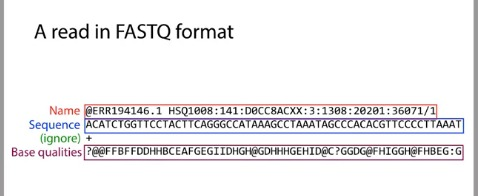

In [23]:
def ASCII_To_QualityNumbers(ASCIICode):
  asciiCodeNumbers= []
  for base in ASCIICode:
    code = ord(base)-33 # Convert character to integer according to ASCII Code
    asciiCodeNumbers.append(code)

  return asciiCodeNumbers



In [24]:
x= ASCII_To_QualityNumbers('GH?@')
x

[38, 39, 30, 31]

In [25]:
def QualityNumbers_To_ASCII(ListofCodeNumbers):
  ASCII_Code = ''
  for i in ListofCodeNumbers:
    ASCII_Code = ASCII_Code+ chr(i+33) #convert integer to its corresponding character according to ASCII code


  return ASCII_Code




In [26]:
QualityNumbers_To_ASCII(x)

'GH?@'

#Read FastQ files and Extract sequences and their ASCII Code

In [27]:
def ReadFastQ_Files(FastqFile):
  sequences = []
  qualities = []

  with open(FastqFile,'r') as fq:
    while True:
      fq.readline()
      seq = fq.readline().rstrip()
      fq.readline()
      qual = fq.readline().rstrip()

      if (len(seq)==0):
        break;

      sequences.append(seq)
      qualities.append(qual)

  return sequences , qualities



In [28]:
s,q= ReadFastQ_Files('/content/ERR037900_1.first1000.fastq') # download link : https://github.com/michael51097/Algorithms-for-DNA-Sequencing/blob/main/ERR037900_1.first1000.fastq

In [29]:
s

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC',
 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTNACCCTAAC',
 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC',
 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTACC',
 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAAACCTAACC',
 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAACCCTAACC',
 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAACCCTAACC',
 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNAACCTAACCCTAACCCTAACTCTAACCCTAACC',
 'ACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTANCCCTAACCCTAACCCTAACCCTAACCCTAACCC',
 'CCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTA

In [30]:
len(s)

1000

In [31]:
q

['HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHEHHBA#C>@54455C/7=CGHEGEB;C############',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGHHHHHHHHHHHHHDHHHDEHHHHFGIHEHEGGGF4#45655366GIGEHAGBG################',
 'HHHHHHHHHHHHHHHHHHHHHHHHHIHHHHHHHHHHHHHHHHHHHHHHIHHHHHIHFHHHIHHHHD#ECA54655GGIBH?BD@+BCBF?5A=::>8?##',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHIHEHHIGHIFFHIIGF6#555:2=7=CB;?3CAACBAC2B###########',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHHHIHIHHHGH:#@@@@9@C@EEGCGGFIFFF9FCAF?EEE4B8>>',
 "HHHHHHHHHHHHHHHHHHHHHHIFHFEGGFHHHHHHGHHHHGHHHHHFHAFGHEHHIHHGBCCDC,#55564565CE:BB44+'5/36,(<<BC<DDBCE",
 'HHFHHDHHHHDDGGGDHDHHHHHGHHHHHHHDHHECHHH8GGDEEHHHHEH?3HG<=4>555624/#5/55/555DADA#####################',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHIIFIHEIIGFI@#==?46560GAAEDGGDGCA8CCB=@########',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH

In [32]:
len(q)

1000

Convert ASCII codes to Quality Scores

In [33]:
qualities_values = []
for i in q :
  z = ASCII_To_QualityNumbers(i)

  qualities_values.append(z)

print(qualities_values,end='')

[[39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 37, 39, 39, 39, 37, 39, 37, 37, 39, 39, 39, 39, 39, 38, 39, 39, 37, 39, 36, 39, 31, 19, 2, 20, 20, 20, 20, 19, 19, 20, 20, 39, 38, 37, 33, 37, 27, 31, 34, 29, 22, 36, 36, 37, 31, 37, 33, 36, 35, 35, 35, 27, 28, 34, 27, 36], [39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 34, 39, 39, 39, 39, 36, 39, 39, 33, 32, 2, 34, 29, 31, 20, 19, 19, 20, 20, 34, 14, 22, 28, 34, 38, 39, 36, 38, 36, 33, 26, 34, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 35, 39, 39, 39, 35, 36, 39, 39, 

In [34]:
print(s[0])
print(q[0])
print(qualities_values[0],end= '')

TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC
HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E
[39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 37, 39, 39, 39, 37, 39, 37, 37, 39, 39, 39, 39, 39, 38, 39, 39, 37, 39, 36, 39, 31, 19, 2, 20, 20, 20, 20, 19, 19, 20, 20, 39, 38, 37, 33, 37, 27, 31, 34, 29, 22, 36, 36, 37, 31, 37, 33, 36, 35, 35, 35, 27, 28, 34, 27, 36]

#Visualize

<BarContainer object of 100 artists>

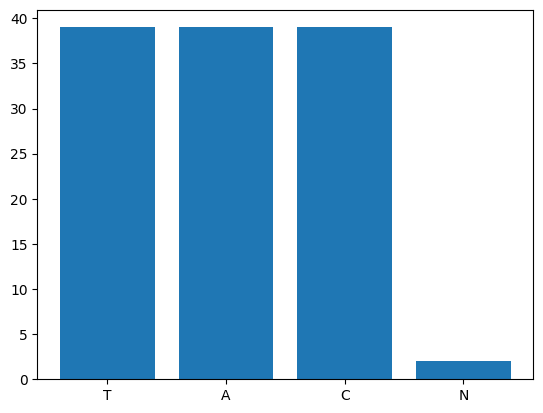

In [35]:
import matplotlib.pyplot as plt

plt.bar(list(s[0]),qualities_values[0])







#Analyze the GC content

In [36]:
import collections as coll
count = coll.Counter()
for x in s:
  count.update(x)

count


Counter({'T': 22476, 'A': 24057, 'C': 29665, 'N': 914, 'G': 22888})

We can use this to measure the GC content but we use the ways do that from the whole reads

Find

- GC content length

- Whole reads length

- GC percentage

In [37]:
def findGC_content(reads):

  G_or_C = 0
  Whole_length = 0
  for i in reads:
    for x in i:
      Whole_length = Whole_length +1
      if(x=='G' or x=='g' or x=='C' or x=='c'):
        G_or_C = G_or_C+1

  GC_percent  = (G_or_C / Whole_length) * 100
  return G_or_C , Whole_length , GC_percent



In [38]:
GCLen , Whole_len , GC_perc = findGC_content(s)

In [39]:
GC_perc

52.553000000000004

In [40]:
Whole_len

100000

we have 1000 reads each read contains 100 nuclotide

In [41]:
GCLen

52553

Find where the G or C appears in the whole reads

In [42]:
def whereGC_Appears(reads):

  pos = []
  for read_index,x in enumerate(reads):
    for GC_index ,i in enumerate(x):
      if(i=='G' or i=='g' or i=='C' or i=='c'):
        pos.append('{} found in Read: {} in index: {}'.format(i,read_index,GC_index))

  return pos




In [43]:
GC_positions = whereGC_Appears(s)

In [44]:
GC_positions

['C found in Read: 0 in index: 3',
 'C found in Read: 0 in index: 4',
 'C found in Read: 0 in index: 5',
 'C found in Read: 0 in index: 9',
 'C found in Read: 0 in index: 10',
 'C found in Read: 0 in index: 11',
 'C found in Read: 0 in index: 15',
 'C found in Read: 0 in index: 16',
 'C found in Read: 0 in index: 17',
 'C found in Read: 0 in index: 21',
 'C found in Read: 0 in index: 22',
 'C found in Read: 0 in index: 23',
 'C found in Read: 0 in index: 27',
 'C found in Read: 0 in index: 28',
 'C found in Read: 0 in index: 29',
 'C found in Read: 0 in index: 33',
 'C found in Read: 0 in index: 34',
 'C found in Read: 0 in index: 35',
 'C found in Read: 0 in index: 39',
 'C found in Read: 0 in index: 40',
 'C found in Read: 0 in index: 41',
 'C found in Read: 0 in index: 45',
 'C found in Read: 0 in index: 46',
 'C found in Read: 0 in index: 47',
 'C found in Read: 0 in index: 51',
 'C found in Read: 0 in index: 52',
 'C found in Read: 0 in index: 53',
 'C found in Read: 0 in index: 5

In [45]:
len(GC_positions)

52553

In [46]:
GC_positions[-1]

'G found in Read: 999 in index: 98'

#Alignment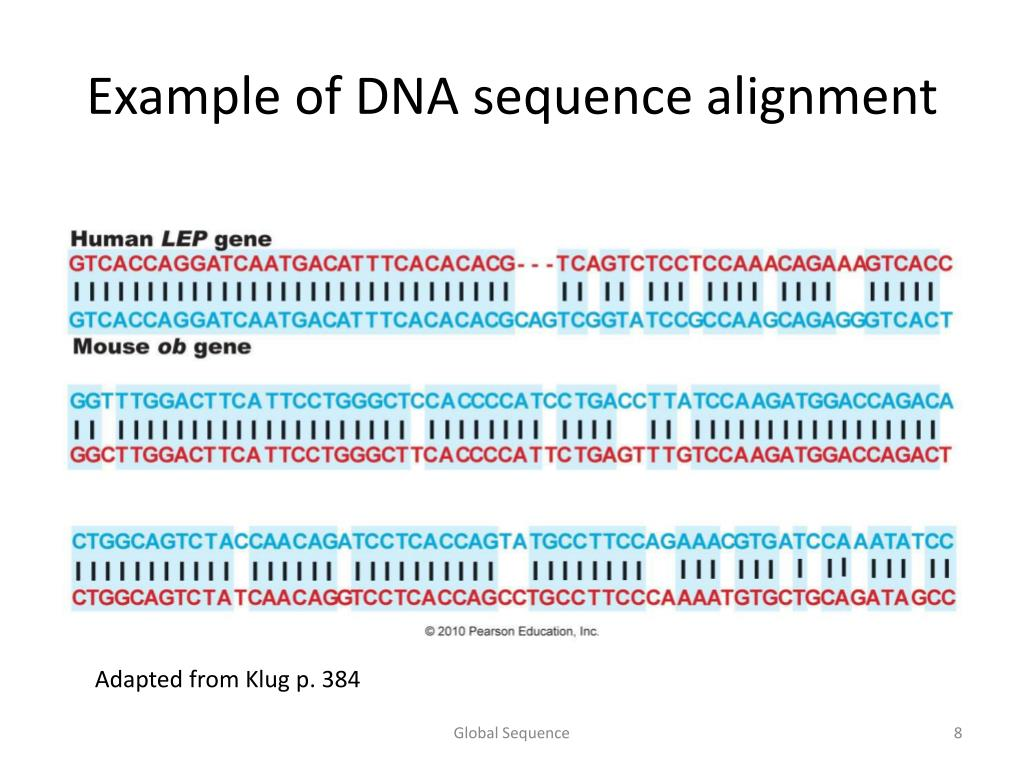

"alignment" refers to the process of arranging two or more DNA sequences in such a way that the similarities and differences between them can be easily seen.

Here we will use Algorithm for Alignment called naive algorithm

First our reference genome will be phix.fa genome and read it


You can download it from https://github.com/michael51097/Algorithms-for-DNA-Sequencing/blob/main/phix.fa

In [47]:
ref_genome = readGenome('/content/phix.fa')
ref_genome

'GAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCGGATATTTCTGATGAGTCGAAAAATTATCTTGATAAAGCAGGAATTACTACTGCTTGTTTACGAATTAAATCGAAGTGGACTGCTGGCGGAAAATGAGAAAATTCGACCTATCCTTGCGCAGCTCGAGAAGCTCTTACTTTGCGACCTTTCGCCATCAACTAACGATTCTGTCAAAAACTGACGCGTTGGATGAGGAGAAGTGGCTTAATATGCTTGGCACGTTCGTCAAGGACTGGTTTAGATATGAGTCACATTTTGTTCATGGTAGAGATTCTCTTGTTGACATTTTAAAAGAGCGTGGATTACTATCTGAGTCCGATGCTGTTCAACCACTAATAGGTAAGAAATCATGAGTCAAGTTACTGAACAATCCGTACGTTTCCAGACCGCTTTGGCCTCTATTAAGCTCATTCAGGCTTCTGCCGTTTTGGATTTAACCGAAGATGATTTCGATTTTCTGACGAGTAACAAAGTTTGGATTGCTACTGACCGCTCTCGTGCTCGTCGCTGCGTTGAGGCTTGCGTTTATGGTACGCTGGACTTTGTGGGATACCCTCGCTTTCCTGCTCCTGTTGAGTTTATTGCTGCCGTCATTGCTTATTATGTTCATCCCGTCAACATTCAAACGGCCTGTCTCATCATGGAAGGCGCTGAATTTACGGAAAACATTATTAATGGCGTCGAGCGTCCGGTTAAAGCCGCTGAATTGTTCGCGTTTACCTTGCGTGTACGCGCAGGAAACACTGACGTTCTTACTGACGCAGAAGAAAACGTGCGTCAAAAATTACGTGCGGAAGGAGTGATGTAATGTCTAAAGGTAAAAAACGTTCTGGCGCTCGCCCTGGTCGTCCGCAGCCGTTGCGAGGTACTAAAGGCAAGCGTAAAGGCGCTCGTCTTTGGTATGTAGGTGGTCAACAATTTTAATTGCAGGGGCTTCGGCCCCTTACTTGAGGATAAAT

In [48]:
len(ref_genome)

5386

we used the function "readGenome" we created before to read genome from fa files

In [62]:
def naive_Algorithm(seq,refGenome):
  occurrences = [] #store every place seq can starts in refGenome
  for i in range (len(refGenome)-len(seq)+1):
    matching = True
    for j in range (len(seq)):
      if refGenome[i+j]!= seq[j]:
        matching = False
        break
    if matching:
      occurrences.append(i)
  return occurrences

In [70]:
my_reference = 'TCAGTTACGATGCGGGAATTCGACTAGATCA'
my_seq = 'TCA'
z= naive_Algorithm(my_seq,my_reference)
z

[0, 28]

In [72]:
c[0:0+len(my_seq)]

'TCA'

In [73]:
c[28:28+len(my_seq)]

'TCA'

lets Generate random reads from our genome

In [84]:
import random
def Generate_random_sequences_from_Genome (genome,numberOfSequences,lenOfSeq):
  reads = []
  for _ in range (numberOfSequences):
    start= random.randint(0,len(genome)-lenOfSeq)
    reads.append(genome[start:start+lenOfSeq])

  return reads


In [86]:
reads= Generate_random_sequences_from_Genome(ref_genome,100,100)
reads

['ATGCCTCCAAATCTTGGAGGCTTTTTTATGGTTCGTTCTTATTACCCTTCTGAATGTCACGCTGATTATTTTGACTTTGAGCGTATCGAGGCTCTTAAAC',
 'TCTGCAAGCTGCTTATGCTAATTTGCATACTGACCAAGAACGTGATTACTTCATGCAGCGTTACCATGATGTTATTTCTTCATTTGGAGGTAAAACCTCT',
 'CCACTATGAAATCGCGTAGAGGCTTTGCTATTCAGCGTTTGATGAATGCAATGCGACAGGCTCATGCTGATGGTTGGTTTATCGTTTTTGACACTCTCAC',
 'ATTTTGTTCATGGTAGAGATTCTCTTGTTGACATTTTAAAAGAGCGTGGATTACTATCTGAGTCCGATGCTGTTCAACCACTAATAGGTAAGAAATCATG',
 'ACTGGACAATCAGAAAGAGATTGCCGAGATGCAAAATGAGACTCAAAAAGAGATTGCTGGCATTCAGTCGGCGACTTCACGCCAGAATACGAAAGACCAG',
 'GGTTGATATTTTTCATGGTATTGATAAAGCTGTTGCCGATACTTGGAACAATTTCTGGAAAGACGGTAAAGCTGATGGTATTGGCTCTAATTTGTCTAGG',
 'GAATCAGGTTATTAAAGAGATTATTTGTCTCCAGCCACTTAAGTGAGGTGATTTATGTTTGGTGCTATTGCTGGCGGTATTGCTTCTGCTCTTGCTGGTG',
 'TAACCCTGATGAGGCCGCCCCTAGTTTTGTTTCTGGTGCTATGGCTAAAGCTGGTAAAGGACTTCTTGAAGGTACGTTGCAGGCTGGCACTTCTGCCGTT',
 'GGCTAAATACGTTAACAAAAAGTCAGATATGGACCTTGCTGCTAAAGGTCTAGGAGCTAAAGAATGGAACAACTCACTAAAAACCAAGCTGTCGCTACTT',
 'ATACCCTCGCTTTCCTGCTCCTGTTGAGTTTATTGCTGCCGTCATTGCTTATT

In [87]:
numMatched = 0
for r in reads :
  matches = naive_Algorithm(r , ref_genome)
  if len(matches) > 0 :
    numMatched = numMatched+1


In [88]:
numMatched

100

we assigned Aligment on reads we created

lets use natural reads from ERR266411_1.for_asm.fastq and align it with refrence genome

you can download it from here : https://github.com/michael51097/Algorithms-for-DNA-Sequencing/blob/main/ERR266411_1.for_asm.fastq

In [92]:
natural_reads,_ = ReadFastQ_Files('/content/ERR266411_1.for_asm.fastq')
natural_reads

['TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC',
 'AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATACGAAAGTGTTAACTTCTGCGTCATGGACACGAAAAAACTCCC',
 'AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTCTG',
 'AGCCGACGTTTTGGCGGCGCAACCTGTGACGACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTTTATC',
 'GACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCG',
 'CTGTAGCCGACGTTTTGGCGGCGCAACCTGTGACGACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTT',
 'CTGTGACGACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTTTATCGCTTCCATGACGCAGAAGTTAAC',
 'CAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCGGA',
 'GTAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGCAATATCCGAAAGAGTTAACTTTTGCGTCATGGAAGCGATAAAACC',
 'GTAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCA

In [95]:
len(natural_reads)

10000

In [93]:
num_of_matching = 0 #counter
for r in natural_reads:
  matchees = naive_Algorithm(r,ref_genome)
  if len(matchees) > 0:
    num_of_matching = num_of_matching+1

num_of_matching

502

this means 502 from 10000 reads matches with the refrence genome

Fastaq files came from sequencers

In [96]:
num_of_match = 0 #counter
for r in natural_reads:
  r = r[:30]
  matcheees = naive_Algorithm(r,ref_genome)
  if len(matcheees) > 0:
    num_of_matching = num_of_matching+1

num_of_matching

4065

this was about matching by using the read in only one direction

What about the reverse direction of the read?

we will use function we created before "FindReverseComplementarySeq" use the reverse of read in matching also


In [100]:
num_of_matching = 0 #counter
for r in natural_reads:
  matchees = naive_Algorithm(r,ref_genome)
  matchees.extend(naive_Algorithm(FindReverseComplementarySeq(r),ref_genome))
  if len(matchees) > 0:
    num_of_matching = num_of_matching+1

num_of_matching

1064